# Applied Data Analysis Course Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns= 163
pd.options.display.max_rows=163

## B. Manipulating the data

In [2]:
df = pd.read_csv('/data/ml_course/02_Data_Analysis/en.openfoodfacts.org.products.csv', index_col=0, parse_dates=[4, 6])
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

### Topic 2: Carbon footprint

## Keep only relevant columns for the task

In [3]:
df2 = df.loc[:, ['product_name', 'origins', 'countries_en', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'carbon-footprint_100g', 'nutrition-score-uk_100g']]
df2.head()

,product_name,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g
2,Peanuts,Unknown,United States,17.86,60.71,17.86,NaN,0.0
3,Organic Salted Nut Mix,Unknown,United States,57.14,17.86,17.86,NaN,12.0
4,Organic Polenta,Unknown,United States,1.43,77.14,8.57,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,Unknown,United States,18.27,63.46,13.46,NaN,NaN
6,Organic Long Grain White Rice,Unknown,United States,NaN,80.00,8.89,NaN,NaN


In [4]:
df2.isna().sum()

product_name                    0
origins                         0
countries_en                    0
fat_100g                     4232
carbohydrates_100g           4458
proteins_100g                4439
carbon-footprint_100g      261812
nutrition-score-uk_100g     40268
dtype: int64

In [5]:
df2.shape

(262050, 8)

In [6]:
# drop rows that do not contain information
df2.dropna(inplace=True)
df2.isna().sum()

product_name               0
origins                    0
countries_en               0
fat_100g                   0
carbohydrates_100g         0
proteins_100g              0
carbon-footprint_100g      0
nutrition-score-uk_100g    0
dtype: int64

In [7]:
df2.shape

(220, 8)

In [8]:
df2.sort_values(by='carbon-footprint_100g', ascending=False, inplace=True)
df2.head(20)

,product_name,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g
326545,Suprême Noir Authentique,Unknown,Switzerland,47.0,26.00,9.0,2842.0000,16.0
206892,Viande des grisons,"Suisse,France",France,3.3,0.60,40.0,2520.0000,13.0
326274,Noir Special 72 % Frey,Unknown,"France,Switzerland",46.0,31.00,8.0,2509.0000,17.0
208263,Saucisson sec,Unknown,France,34.0,2.67,24.0,2380.0000,25.0
323403,Chocolat blanc,Unknown,Switzerland,33.0,62.00,3.5,1440.0000,22.0
323404,Chocolat au lait,Unknown,Switzerland,30.0,61.00,5.0,1321.0000,21.0
326275,Chocolat Tourist Crémant,Unknown,Switzerland,33.0,50.00,6.0,1311.0000,25.0
326300,Chocolat noir fourré à la crème d'amandes,Unknown,Switzerland,37.0,49.00,7.0,1293.0000,22.0
208273,Jambon de Bayonne,"Bayonne,France",France,15.0,0.80,30.0,1285.0000,19.0
207718,Emmental Français Est-Central IGP au lait cru ...,France,France,32.0,0.10,28.0,1275.0000,16.0


In [9]:
df2.tail(20)

,product_name,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g
207036,Biscottes pauvres en sel,Unknown,France,5.1,75.0,12.00,4.700000,-4.0
207037,Biscottes au froment,Unknown,France,4.9,72.0,11.00,4.500000,6.0
208481,Coquillettes au Blé Complet,Unknown,France,2.3,64.0,14.00,4.400000,-6.0
207506,Chips à l'ancienne saveur moutarde,Unknown,France,37.0,48.0,5.80,4.100000,10.0
178093,confiture abricots,"loire atlantique,France",France,11.0,51.0,9.00,0.000001,-4.0
341039,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.00,0.000000,12.0
341031,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.00,0.000000,12.0
341032,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.00,0.000000,20.0
341033,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.00,0.000000,20.0
341034,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.00,0.000000,12.0


In [10]:
df2['macronutrients_100g'] = df2['fat_100g']+df2['carbohydrates_100g']+df2['proteins_100g']
df2.sort_values(by='macronutrients_100g', ascending=False, inplace=True)
df2.head(20)

,product_name,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g,macronutrients_100g
341040,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,12.0,100.0
341034,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,12.0,100.0
341031,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,12.0,100.0
341032,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,20.0,100.0
228740,Fleur de colza,France,France,100.0,0.0,0.0,150.0,16.0,100.0
341033,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,20.0,100.0
207660,"Huile d'olive vierge extra, extraite à froid",Italie,France,100.0,0.0,0.0,276.0,20.0,100.0
341018,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,20.0,100.0
341022,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,20.0,100.0
341039,Aceite de oliva virgen extra &quot;Esencia And...,España,Spain,100.0,0.0,0.0,0.0,12.0,100.0


In [11]:
# drop data that have a carbon-footprint of 0
df2 = df2[df2['carbon-footprint_100g'] > 0.]
df2.shape

(205, 9)

In [12]:
df2.head(20)

,product_name,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g,macronutrients_100g
228740,Fleur de colza,France,France,100.0,0.0,0.0,150.0,16.0,100.0
207660,"Huile d'olive vierge extra, extraite à froid",Italie,France,100.0,0.0,0.0,276.0,20.0,100.0
323403,Chocolat blanc,Unknown,Switzerland,33.0,62.0,3.5,1440.0,22.0,98.5
270364,Sucre Canne Complet,Philippines,France,0.0,98.0,0.0,136.0,14.0,98.0
270420,Noir pointe de piment,Équateur,France,38.7,52.5,6.7,219.0,20.0,97.9
270418,Chocolat noir Équateur 70%,Équateur,France,42.9,46.3,8.4,237.0,18.0,97.6
270419,République Dominicaine 80%,République Dominicaine,France,51.3,36.4,9.8,220.0,16.0,97.5
270421,Noir Éclats de Gingembre,"Equateur,Coopératives Fortaleza Unocace",France,35.8,55.5,6.1,205.0,20.0,97.4
270367,Chocolat Noir Doux Et Fondant Bio & équitable,"Pérou,Coopérative Acopagro",France,37.6,53.8,5.8,273.0,21.0,97.2
270410,Noir Éclats de Menthe Pérou (lot de 2),Pérou,France,35.0,57.5,4.6,153.0,21.0,97.1


Question: What is the macronutrient breakdown among the 20 products that have the highest carbon footprint and the 20 products that have the lowest footprint?

In [13]:
cols = df2.columns[3:6]
for col in cols:
    df2[col+'_percent'] = df2[col]/df2['macronutrients_100g']*100.
df2.head()

,product_name,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g,macronutrients_100g,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
228740,Fleur de colza,France,France,100.0,0.0,0.0,150.0,16.0,100.0,100.000000,0.000000,0.000000
207660,"Huile d'olive vierge extra, extraite à froid",Italie,France,100.0,0.0,0.0,276.0,20.0,100.0,100.000000,0.000000,0.000000
323403,Chocolat blanc,Unknown,Switzerland,33.0,62.0,3.5,1440.0,22.0,98.5,33.502538,62.944162,3.553299
270364,Sucre Canne Complet,Philippines,France,0.0,98.0,0.0,136.0,14.0,98.0,0.000000,100.000000,0.000000
270420,Noir pointe de piment,Équateur,France,38.7,52.5,6.7,219.0,20.0,97.9,39.530133,53.626149,6.843718


In [14]:
# largest footprint
df_largest = df2.sort_values(by='carbon-footprint_100g', ascending=False).head(20)
df_largest.set_index(keys='product_name', inplace=True)
df_largest.sort_values(by=['fat_100g_percent', 'carbohydrates_100g_percent', 'proteins_100g_percent'], ascending=[False, False, False], inplace=True)
df_largest

,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g,macronutrients_100g,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
product_name,,,,,,,,,,,
Suprême Noir Authentique,Unknown,Switzerland,47.0,26.00,9.0,2842.0000,16.0,82.00,57.317073,31.707317,10.975610
Val d'Automne (28 % MG),Unknown,France,28.0,1.00,20.0,1065.0000,22.0,49.00,57.142857,2.040816,40.816327
Saucisson sec,Unknown,France,34.0,2.67,24.0,2380.0000,25.0,60.67,56.040877,4.400857,39.558266
Noir Special 72 % Frey,Unknown,"France,Switzerland",46.0,31.00,8.0,2509.0000,17.0,85.00,54.117647,36.470588,9.411765
Emmental Français Est-Central IGP au lait cru (32 % MG) Grand Cru - label Rouge,France,France,32.0,0.10,28.0,1275.0000,16.0,60.10,53.244592,0.166389,46.589018
Emmental Français Râpé (29 % MG),France,France,29.0,0.00,27.0,1127.0000,17.0,56.00,51.785714,0.000000,48.214286
Emmental Français Râpé (29 % MG),France,France,29.0,0.00,27.0,1113.0547,17.0,56.00,51.785714,0.000000,48.214286
Suprême Lait Noisettes,Unknown,Switzerland,39.0,46.00,8.0,1001.0000,21.0,93.00,41.935484,49.462366,8.602151
Chocolat noir fourré à la crème d'amandes,Unknown,Switzerland,37.0,49.00,7.0,1293.0000,22.0,93.00,39.784946,52.688172,7.526882


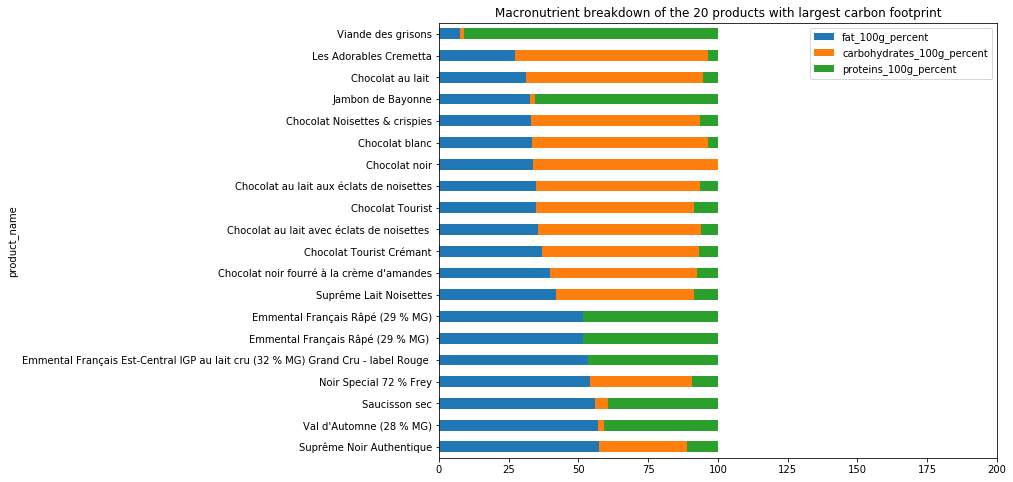

In [15]:
df_largest.loc[:, 'fat_100g_percent':].plot.barh(stacked=True, figsize=[10, 8], title='Macronutrient breakdown of the 20 products with largest carbon footprint')
plt.xlim([0, 200])
plt.show()

In [16]:
# smallest footprint
df_smallest = df2.sort_values(by='carbon-footprint_100g', ascending=True).head(20)
df_smallest.set_index(keys='product_name', inplace=True)
df_smallest.sort_values(by=['fat_100g_percent', 'carbohydrates_100g_percent', 'proteins_100g_percent'], ascending=[False, False, False], inplace=True)
df_smallest

,origins,countries_en,fat_100g,carbohydrates_100g,proteins_100g,carbon-footprint_100g,nutrition-score-uk_100g,macronutrients_100g,fat_100g_percent,carbohydrates_100g_percent,proteins_100g_percent
product_name,,,,,,,,,,,
Chips à l'ancienne saveur moutarde,Unknown,France,37.0,48.0,5.8,4.100000,10.0,90.8,40.748899,52.863436,6.387665
Chips nature,Unknown,France,35.0,51.0,5.2,5.800000,8.0,91.2,38.377193,55.921053,5.701754
Chips saveur barbecue,Unknown,France,34.0,50.0,6.4,5.500000,17.0,90.4,37.610619,55.309735,7.079646
"Budgetmilch 1,5%",Suisse,Switzerland,1.6,5.0,3.5,45.300000,-1.0,10.1,15.841584,49.504950,34.653465
confiture abricots,"loire atlantique,France",France,11.0,51.0,9.0,0.000001,-4.0,71.0,15.492958,71.830986,12.676056
Yogourt Ananas,Unknown,Switzerland,3.0,14.0,3.0,48.200000,3.0,20.0,15.000000,70.000000,15.000000
Tresse au beurre,"Suisse,Terrasuisse",Switzerland,8.0,45.0,10.0,32.300000,8.0,63.0,12.698413,71.428571,15.873016
Biscottes au froment,Unknown,France,4.9,72.0,11.0,4.500000,6.0,87.9,5.574516,81.911263,12.514221
Biscottes pauvres en sel,Unknown,France,5.1,75.0,12.0,4.700000,-4.0,92.1,5.537459,81.433225,13.029316


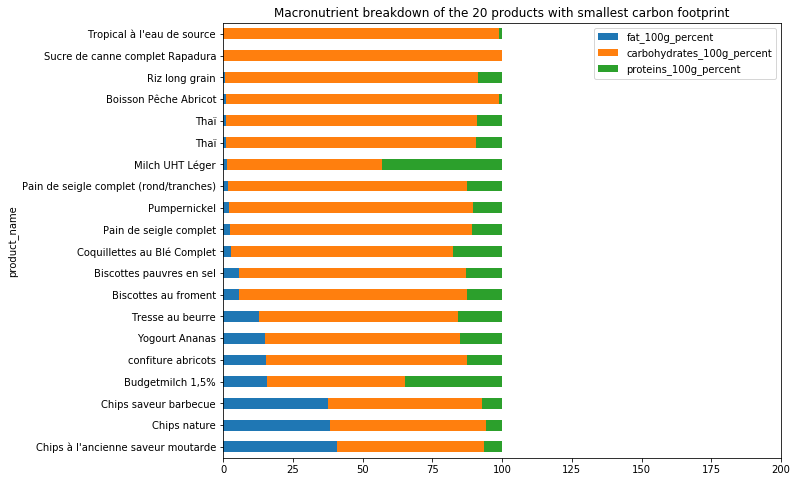

In [17]:
df_smallest.loc[:, 'fat_100g_percent':].plot.barh(stacked=True, figsize=[10, 8], title='Macronutrient breakdown of the 20 products with smallest carbon footprint')
plt.xlim([0, 200])
plt.show()

Relationship between macronutrient percentage and carbon footprint

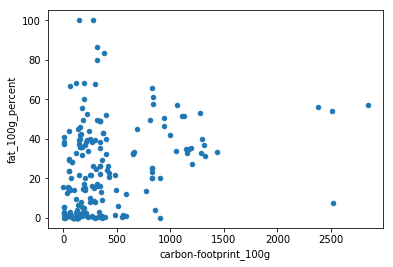

In [18]:
df2.plot.scatter(x='carbon-footprint_100g', y='fat_100g_percent')
plt.show()

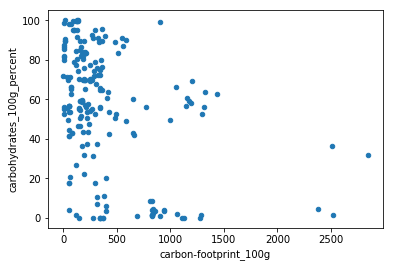

In [19]:
df2.plot.scatter(x='carbon-footprint_100g', y='carbohydrates_100g_percent')
plt.show()

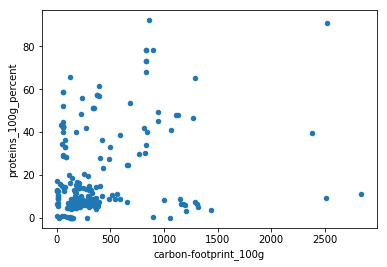

In [20]:
df2.plot.scatter(x='carbon-footprint_100g', y='proteins_100g_percent')
plt.show()

Carbon footprint between different countries

In [21]:
countries = df2.countries_en
countries = countries.str.split(',', expand=True)
countries = countries.stack().to_frame(name='country')
countries['value'] = 1
unique_countries = countries.groupby('country').sum()
unique_countries.sort_values(by='value', ascending=False, inplace=True)
unique_countries

,value
country,
France,138
Switzerland,71
Belgium,1
Germany,1
Hong Kong,1
United Kingdom,1
United States,1


There is no point on analysing the carbon footprint by country. Let's see if we can analyse it by origin instead

In [22]:
orig = df2.origins
orig.head()

228740         France
207660         Italie
323403        Unknown
270364    Philippines
270420       Équateur
Name: origins, dtype: object

In [23]:
orig.unique()

array(['France', 'Italie', 'Unknown', 'Philippines', 'Équateur',
       'République Dominicaine',
       'Equateur,Coopératives Fortaleza Unocace',
       'Pérou,Coopérative Acopagro', 'Pérou', 'Pérou,non UE',
       'Paraguay,République dominicaine,Coopérative Conacado', 'Equateur',
       'agriculture non UE,Pérou',
       'Pérou,Paraguay,République Dominicaine,Madagascar', 'BRASILIA',
       'Colombie,Perou,Coopérative Naranjillo', 'Thaïlande',
       'Pérou,Coopérative Acopagro,Non UE', 'agriculture UE',
       'Inde,Schweiz', 'coopérative O.R.F.S.C,Thailande',
       'France,coopérative CORAB Poitou-Charente,agriculture UE / non UE',
       'Agriculture UE', 'France,Coopérative Corab,Poitou-Charentes',
       'Communauté Européenne,Monde,Hors Communauté Européenne',
       'Espagne', 'Pérou,Paraguay,Madagascar,République dominicaine',
       'loire atlantique,France', 'Suisse,Terrasuisse', 'England',
       'Belgique', 'Maroc', 'Bayonne,France', 'Suisse,France',
       'Porc,Union

In [24]:
# Transform states data
def  transform(s):    
    # Translate
    s=s.str.replace('Italie', 'Italy')
    s=s.str.replace('[ÉE]quateur', 'Ecuador')
    s=s.str.replace('République [Dd]ominicaine', 'Dominican Republic')
    s=s.str.replace('P[ée]rou', 'Peru')
    s=s.str.replace('Colombie', 'Colombia')
    s=s.str.replace('Tha[iï]lande', 'Thailand')
    s=s.str.replace('Inde', 'India')
    s=s.str.replace('Espagne', 'Spain')
    s=s.str.replace('Suisse', 'Switzerland')
    s=s.str.replace('Schweiz', 'Switzerland')
    s=s.str.replace('Brésil', 'Brazil')
    s=s.str.replace('England', 'United Kingdom')
    s=s.str.replace('Belgique', 'Belgium')
    s=s.str.replace('Maroc', 'Morocco')
    s=s.str.replace('Union Européenne', 'European Union')
    s=s.str.replace('Communauté Européenne', 'European Union')
    
    # Remove non-country information
    s=s.str.replace(',Coopératives Fortaleza Unocace', '')
    s=s.str.replace(',Coopérative Acopagro', '')
    s=s.str.replace(',Coopérative Conacado', '')
    s=s.str.replace(',Coopérative Naranjillo', '')
    s=s.str.replace('coopérative O.R.F.S.C,', '')
    s=s.str.replace(',coopérative CORAB Poitou-Charente', '')
    s=s.str.replace(',Coopérative Corab,Poitou-Charentes', '')
    s=s.str.replace(',coopérative A.P.P.T.A.', '')
    s=s.str.replace(',Coopérative Coagrosol', '')    
    s=s.str.replace(',Coopérative SOFA', '')    
    
    s=s.str.replace('loire atlantique,', '')
    s=s.str.replace('loire atlantique,', '')
    s=s.str.replace(',Terrasuisse', '')
    s=s.str.replace('Bayonne,', '')
    s=s.str.replace('Porc,', '')
    s=s.str.replace('Lau Balagnas', 'France')
    
    s=s.str.replace('[Aa]griculture ', '')
    s=s.str.replace('BRASILIA', 'Brazil')
    
    s=s.str.replace(
        'Aqualande,40120 Sarbazan,Landes,Truite arc-en-ciel \(Oncorhynchus mykiss\),France,'
        'Gave de Pau,Soulom,Gave de Gavarnie,Hautes-Pyrénées,Midi-Pyrénées,Bruges,Rivière Le Béez,'
        'Pyrénées-Atlantiques,Aquitaine,France', 'France')
    s=s.str.replace(
        'France \(65\),Bruges \(64\),Esterençuby \(64\)', 'France')
    s=s.str.replace(
        'Saumon \(Salmo salar\)', 'France')
    s=s.str.replace(
        'Aqualande,40120 Sarbazan,Landes,Aquitaine,France,Truites arc-en-ciel élevées en Europe', 'France')
    
    s=s.str.replace('European Union,Monde,Hors European Union', 'Unknown')
    s=s.str.replace('France,UE / non UE', 'Unknown')
    s=s.str.replace(',[nN]on UE', '')
    s=s.str.replace('[nN]on UE,', '')
    s=s.str.replace('UE', 'European Union')
           
    return(s)

In [25]:
orig = transform(orig)
orig.unique()

array(['France', 'Italy', 'Unknown', 'Philippines', 'Ecuador',
       'Dominican Republic', 'Peru', 'Paraguay,Dominican Republic',
       'Peru,Paraguay,Dominican Republic,Madagascar', 'Brazil',
       'Colombia,Peru', 'Thailand', 'European Union', 'India,Switzerland',
       'Spain', 'Peru,Paraguay,Madagascar,Dominican Republic',
       'Switzerland', 'United Kingdom', 'Belgium', 'Morocco',
       'Switzerland,France', 'Sri Lanka', 'Switzerland, Switzerland',
       'Costa Rica'], dtype=object)

Carbon footprint of products with known origin respect to those where origin is not specified 

In [26]:
df2.origins = orig

In [27]:
orig2 = orig.str.split(',', expand=True)
orig2 = orig2.stack().to_frame(name='country')
orig2['value'] = 1
unique_orig = orig2.groupby('country').sum()
unique_orig.sort_values(by='value', ascending=False, inplace=True)
unique_orig

,value
country,
Unknown,113
France,28
Peru,17
Switzerland,14
European Union,6
Brazil,4
Dominican Republic,4
Ecuador,4
Morocco,4


In [28]:
df_unknown = df2[df2.origins.str.contains('Unknown')]['carbon-footprint_100g']
df_unknown.head()

323403    1440.0
323405    1194.0
323404    1321.0
246578     190.0
208126     265.0
Name: carbon-footprint_100g, dtype: float64

In [29]:
df_known = df2[~df2.origins.str.contains('Unknown')]['carbon-footprint_100g']
df_known.head()

228740    150.0
207660    276.0
270364    136.0
270420    219.0
270418    237.0
Name: carbon-footprint_100g, dtype: float64

In [30]:
df_unknown.describe()

count     113.000000
mean      400.843805
std       508.878194
min         4.100000
25%        71.500000
50%       234.500000
75%       416.400000
max      2842.000000
Name: carbon-footprint_100g, dtype: float64

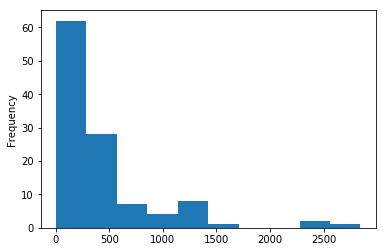

In [31]:
df_unknown.plot.hist()
plt.show()

In [32]:
df_known.describe()

count      92.000000
mean      359.652768
std       378.396366
min         0.000001
25%       152.250000
50%       209.500000
75%       389.750000
max      2520.000000
Name: carbon-footprint_100g, dtype: float64

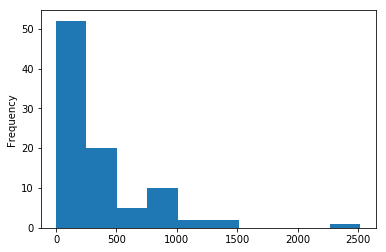

In [33]:
df_known.plot.hist()
plt.show()

Relationship between carbon footprint and food score

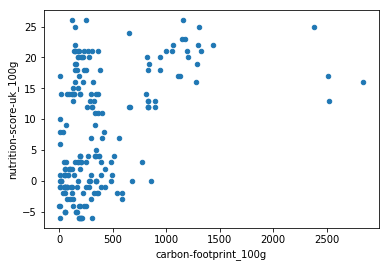

In [34]:
df2.plot.scatter(x='carbon-footprint_100g', y='nutrition-score-uk_100g')
plt.show()